In [5]:
%load_ext autoreload
%autoreload 2
import datetime
import os
print(datetime.datetime.now())

from pygentoolbox import CharSeqPipeline
# from pygentoolbox.Tools import read_interleaved_fasta_as_noninterleaved
# from pygentoolbox.Tools import make_circos_karyotype_file
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2021-10-14 14:42:03.671964


In [6]:
## char_bridge_tools.py requires python2 i'm running python 2.7.17
# pip install Python-Levenshtein
# pip install biopython
# RecordRNADNAContacts.py uses python3 i'm running python 3.7 anaconda
# pip install natsort
forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_OES/WT_L_L1_R1.fastq.gz'
reversereadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_OES/WT_L_L1_R2.fastq.gz'
blastdatabase='/media/sf_LinuxShare/Humans/Genome/Seqs/GRCh38_top_level.fa'
aligndatabase='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/OESv1VCM'

#altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_sRNA20to30bps/pear/WT_L_L1_R1R2.trim.AssUnFUnR.fastq.gz'
altreadfile1 = []
path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_OES/pear/'
for i in range(346):
    splitfile = os.path.join(path, f'WT_L_L1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.dna.bridgePE.fastq.gz')
    altreadfile1.append(splitfile)
    
#altreadfile2='/path/to/altreads2.fastq'
altreadfile2 = []
path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_OES/pear/'
for i in range(346):
    splitfile = os.path.join(path, f'WT_L_L1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.rna.bridgePE.fastq.gz')
    altreadfile2.append(splitfile)
    

steps=['hisat2', 'samtools', 'rnadnacontacts', 'normalize']
# steps=['fastp', 'fastqc', 'pear', 'mergefiles', 'split2chunks', 'charbridge', 'fastq2fasta', 'blast', 'hisat2', 'samtools', 'rnadnacontacts', 'normalize', 'heatmap']
rnalen=20
dnalen=20
rnamaxlen=300
REsequence='GATC'
windowsize=300
contactcutoff=1
MQ=1
sn='Paramecium tetraurelia'

# if mapping to Mac
# hisat2_args='-p 2 --no-softclip'
# if mapping to Mac+IES
hisat2_args='-p 3 --pen-noncansplice 0' # --no-softclip --pen-noncansplice 0 --known-splicesite-infile /media/sf_LinuxShare/Ciliates/Genomes/Annotations/ss.IES.pt_51_MacAndIES.tsv'
genomefile = '/media/sf_LinuxShare/Ciliates/Genomes/Seqs/OES.v1.VCM.fa'
PCRDupRemoval=True

# ptetraurelia_mac_51_annotation_v2.0.gff3
annot_file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3'
features=['internal_eliminated_sequence']


zoomscaffname = 'scaffold51_2'
zoomwinsize = 50
scaffcoordmin, scaffcoordmax = [219999, 354999, 474999, 629999, 839999], [239999, 374999, 484999, 649999, 859999]


CharSeqPipeline.main(forwardreadfile, reversereadfile, blastdatabase, aligndatabase, altreadfile1, altreadfile2, steps, rnalen, dnalen, rnamaxlen, REsequence, windowsize, contactcutoff, MQ, sn, hisat2_args, genomefile, PCRDupRemoval, annot_file, zoomscaffname, zoomwinsize, scaffcoordmin, scaffcoordmax, features)


Starting Hisat2: aligning
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_OES/pear/WT_L_L1_R1R2.trim.AssUnFUnR.split0.DNA20RNA20RNAmax300.rna.bridgePE.fastq.gz
Directory  /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_OES/hisat2  already exists
Finished with Hisat2

Starting Hisat2: aligning
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_OES/pear/WT_L_L1_R1R2.trim.AssUnFUnR.split0.DNA20RNA20RNAmax300.dna.bridgePE.fastq.gz
Directory  /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_OES/hisat2  already exists
Finished with Hisat2

Starting Hisat2: aligning
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_OES/pear/WT_L_L1_R1R2.trim.AssUnFUnR.split1.DNA20RNA20RNAmax300.rna.bridgePE.fastq.gz
Directory  /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_OES/hisat2  already exists
Finished with Hisat2

Starting Hisat2: aligning
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_OES/pear/WT_L_L1_R1R2.trim.AssUnFUnR.split1.DNA20RNA20RNAmax300.dna.bridgePE.fastq.gz
Director

In [1]:
%load_ext autoreload
%autoreload 2
import datetime
import os
print(datetime.datetime.now())

from pygentoolbox import CharSeqPipeline
# from pygentoolbox.Tools import read_interleaved_fasta_as_noninterleaved
# from pygentoolbox.Tools import make_circos_karyotype_file
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

2021-04-06 16:53:45.349992


Start: counting number of restriction sites for each genomic window.
Genome:
/media/sf_LinuxShare/Ciliates/Genomes/Seqs/ptetraurelia_mac_51_with_ies_with_mtDNA.fa
Window size: 300
RE counts to output file: /media/sf_LinuxShare/Ciliates/Genomes/Seqs/ptetraurelia_mac_51_with_ies_with_mtDNA.fa.GATC.CountsPerWindow.300.tsv

Finished counting restriction sites per window

Start: Normalize each window of size (300) by restriction enzyme cut frequency
Finished normalized RNA-DNA contact support by restriction counts per window, output at:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt

Finished normalized RNA-DNA contact support by restriction counts per window, rounded, output at:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNIIrounded.txt

Finished normalized RNA-DNA contact support by restriction counts per window, log2 of normalized support, outpu

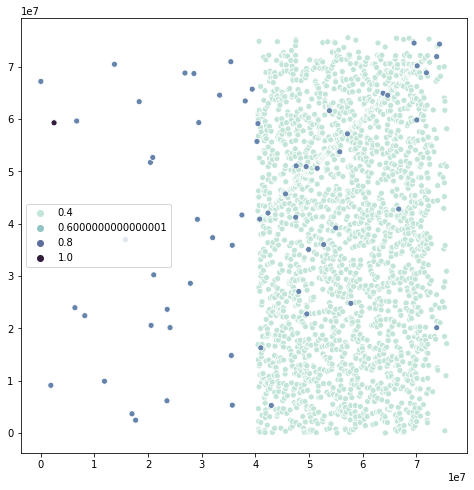

Plotting scatter plot colored by intensity
Finished making scatter plot colored by intensity


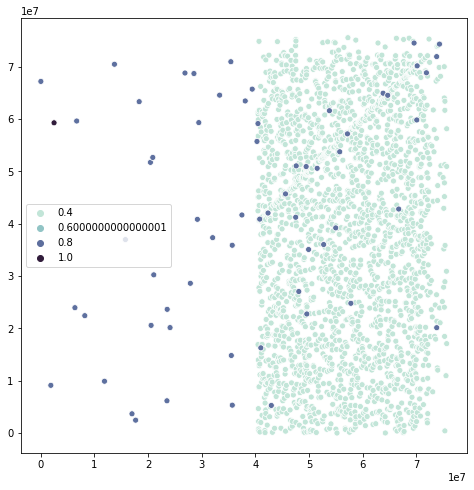

Reading Gff3 file: /media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3
Number of features: 44928
Zooming in on scaffold51_2 from 219999 to 239999
Trimming features to scaffold: scaffold51_2_with_IES, start: 220000, end: 240000
first five features: ['IESPGM.PTET51.1.2.218155', 'IESPGM.PTET51.1.2.218617', 'IESPGM.PTET51.1.2.219164', 'IESPGM.PTET51.1.2.222020', 'IESPGM.PTET51.1.2.223760']
number of features: 13
Maximum coordinate length: 1302443, Minimum coordinate length: 1282443, Window size: 50
400
(400, 400)
Plotting heatmap with horizontal bar plot
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.scaffold51_2.219999.239999.50.barh.log.pdf


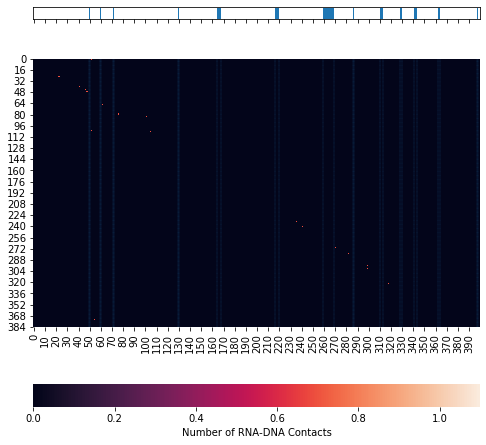

Zooming in on scaffold51_2 from 354999 to 374999
Trimming features to scaffold: scaffold51_2_with_IES, start: 355000, end: 375000
first five features: ['IESPGM.PTET51.1.2.345421', 'IESPGM.PTET51.1.2.345775', 'IESPGM.PTET51.1.2.346954', 'IESPGM.PTET51.1.2.347822', 'IESPGM.PTET51.1.2.348862']
number of features: 18
Maximum coordinate length: 1437443, Minimum coordinate length: 1417443, Window size: 50
400
(400, 400)
Plotting heatmap with horizontal bar plot
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.scaffold51_2.354999.374999.50.barh.log.pdf


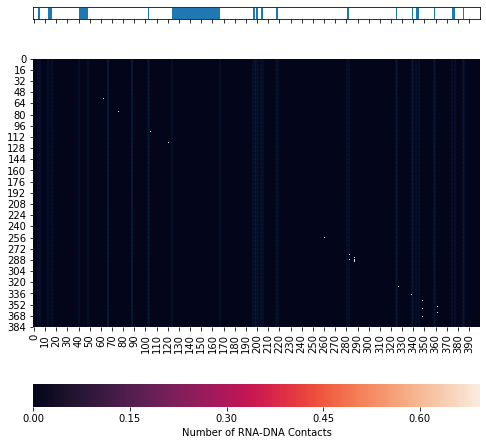

Zooming in on scaffold51_2 from 474999 to 484999
Trimming features to scaffold: scaffold51_2_with_IES, start: 475000, end: 485000
first five features: ['IESPGM.PTET51.1.2.458024', 'IESPGM.PTET51.1.2.460361', 'IESPGM.PTET51.1.2.460903', 'IESPGM.PTET51.1.2.462759', 'IESPGM.PTET51.1.2.463045']
number of features: 6
Maximum coordinate length: 1547443, Minimum coordinate length: 1537443, Window size: 50
200
(200, 200)
Plotting heatmap with horizontal bar plot
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.scaffold51_2.474999.484999.50.barh.log.pdf


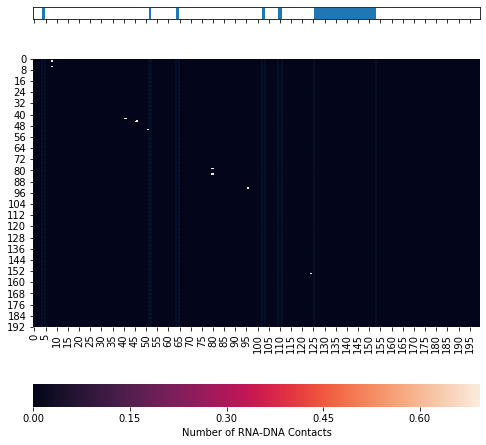

Zooming in on scaffold51_2 from 629999 to 649999
Trimming features to scaffold: scaffold51_2_with_IES, start: 630000, end: 650000
first five features: ['IESPGM.PTET51.1.2.606369', 'IESPGM.PTET51.1.2.609406', 'IESPGM.PTET51.1.2.611415', 'IESPGM.PTET51.1.2.614095', 'IESPGM.PTET51.1.2.615773']
number of features: 7
Maximum coordinate length: 1712443, Minimum coordinate length: 1692443, Window size: 50
400
(400, 400)
Plotting heatmap with horizontal bar plot
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.scaffold51_2.629999.649999.50.barh.log.pdf


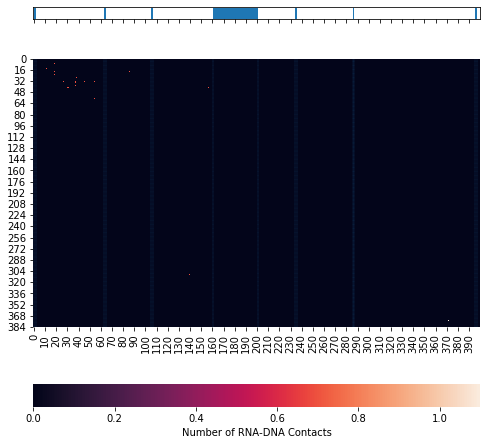

Zooming in on scaffold51_2 from 839999 to 859999
Trimming features to scaffold: scaffold51_2_with_IES, start: 840000, end: 860000
first five features: ['IESPGM.PTET51.1.2.803786', 'IESPGM.PTET51.1.2.806935', 'IESPGM.PTET51.1.2.807459', 'IESPGM.PTET51.1.2.807692', 'IESPGM.PTET51.1.2.808197']
number of features: 19
Maximum coordinate length: 1922443, Minimum coordinate length: 1902443, Window size: 50
400
(400, 400)
Plotting heatmap with horizontal bar plot
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.scaffold51_2.839999.859999.50.barh.log.pdf


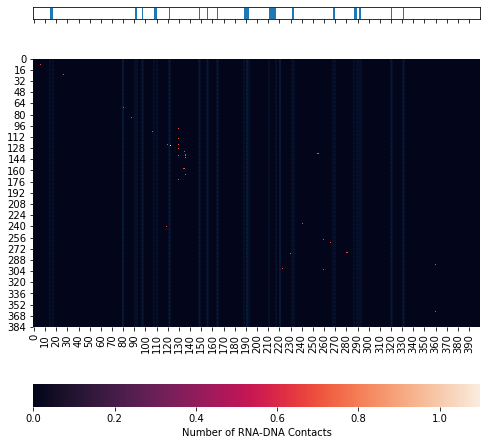

scaffold51_0
Maximum coordinate length: 40469, Minimum coordinate length: 0, Window size: 20000
3
(3, 3)
Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.40469.20000.log.pdf


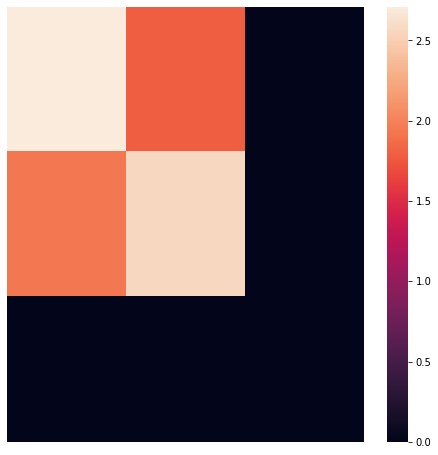

Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.40469.20000.pdf


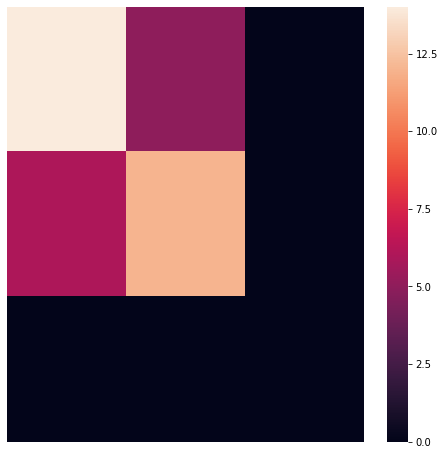

Maximum coordinate length: 40469, Minimum coordinate length: 0, Window size: 5000
9
(9, 9)
Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.40469.5000.log.pdf


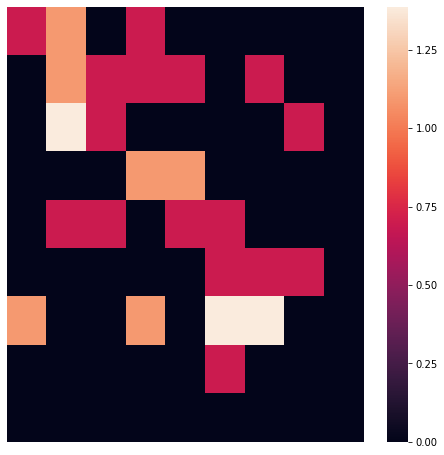

Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.40469.5000.pdf


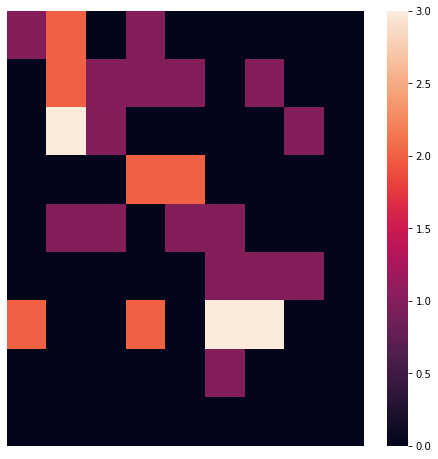

['scaffold51_0', 'scaffold51_1']
Maximum coordinate length: 3000000, Minimum coordinate length: 0, Window size: 5000
600
(600, 600)
Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.3000000.5000.log.pdf


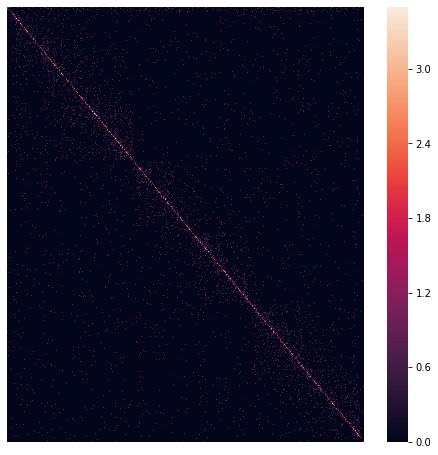

Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.3000000.5000.pdf


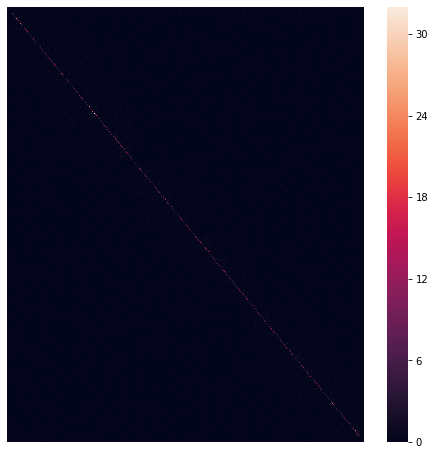

Maximum coordinate length: 75698530, Minimum coordinate length: 0, Window size: 50000
1514
(1514, 1514)
Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.75698530.50000.log.pdf


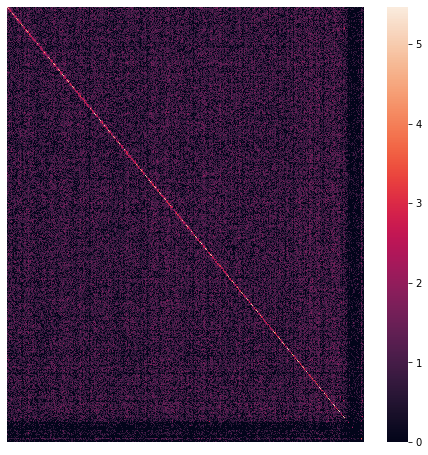

Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.Win300.MQ10.NormDPNII.txt.gencoords.tsv.75698530.50000.pdf


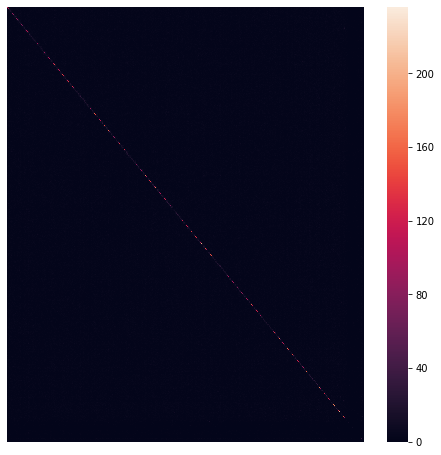

IESPGM.PTET51.1.100.218
Reading Gff3 file: /media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3
Number of features: 0
Converting coordinates for each scaffold to continuous genome coordinates


IndexError: list index out of range

In [2]:
## char_bridge_tools.py requires python2 i'm running python 2.7.17
# pip install Python-Levenshtein
# pip install biopython
# RecordRNADNAContacts.py uses python3 i'm running python 3.7 anaconda
# pip install natsort
forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/WT_E_L1_R1.fastq.gz'
reversereadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/WT_E_L1_R2.fastq.gz'
blastdatabase='/media/sf_LinuxShare/Humans/Genome/Seqs/GRCh38_top_level.fa'
aligndatabase='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_MacAndIES_mtDNA'

#altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_sRNA20to30bps/pear/WT_L_L1_R1R2.trim.AssUnFUnR.fastq.gz'
altreadfile1 = '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/RNA.DNA.Contacts.pt.wthickness.txt'
    
#altreadfile2='/path/to/altreads2.fastq'
altreadfile2 = '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_mtDNA/hisat2/path.to.file.txt'

steps=['normalize', 'heatmap']
# steps=['fastp', 'fastqc', 'pear', 'mergefiles', 'split2chunks', 'charbridge', 'fastq2fasta', 'blast', 'hisat2', 'samtools', 'rnadnacontacts', 'normalize', 'heatmap']
rnalen=20
dnalen=20
rnamaxlen=300
REsequence='GATC'
windowsize=300
contactcutoff=1
MQ=10
sn='Paramecium tetraurelia'

# if mapping to Mac
# hisat2_args='-p 2 --no-softclip'
# if mapping to Mac+IES
hisat2_args='-p 2 --no-softclip --pen-noncansplice 0 --known-splicesite-infile /media/sf_LinuxShare/Ciliates/Genomes/Annotations/ss.IES.pt_51_MacAndIES.tsv'
genomefile = '/media/sf_LinuxShare/Ciliates/Genomes/Seqs/ptetraurelia_mac_51_with_ies_with_mtDNA.fa'
PCRDupRemoval=True

# ptetraurelia_mac_51_annotation_v2.0.gff3
annot_file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3'
features=['internal_eliminated_sequence']


zoomscaffname = 'scaffold51_2'
zoomwinsize = 50
scaffcoordmin, scaffcoordmax = [219999, 354999, 474999, 629999, 839999], [239999, 374999, 484999, 649999, 859999]


CharSeqPipeline.main(forwardreadfile, reversereadfile, blastdatabase, aligndatabase, altreadfile1, altreadfile2, steps, rnalen, dnalen, rnamaxlen, REsequence, windowsize, contactcutoff, MQ, sn, hisat2_args, genomefile, PCRDupRemoval, annot_file, zoomscaffname, zoomwinsize, scaffcoordmin, scaffcoordmax, features)


In [1]:
%load_ext autoreload
%autoreload 2
import datetime
import os
print(datetime.datetime.now())

from pygentoolbox import TrimFileToNumberLines
from pygentoolbox import CharSeqPipeline
# from pygentoolbox.Tools import read_interleaved_fasta_as_noninterleaved
# from pygentoolbox.Tools import make_circos_karyotype_file
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

2020-06-08 13:20:05.287738


In [11]:
# first lets trim the assembled PEAR reads to 50 million reads
f = '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.fastq'
limit = 200000000

TrimFileToNumberLines.main(f,limit)
# i then compressed this file with gzip before running the next cell


On line: 50000000
On line: 100000000
On line: 150000000
On line: 200000000
Finished
On line: 5000000
On line: 10000000
On line: 15000000
On line: 20000000
Finished


In [13]:
# skipping BLAST, running fastq2fasta for gzip decompression of dnafile and rnafile after charbridge


# char_bridge_tools.py requires python2 i'm running python 2.7.17
# pip install Python-Levenshtein
# pip install biopython
# RecordRNADNAContacts.py uses python3 i'm running python 3.7 anaconda
# pip install natsort
# forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_50MilReads/WT_E_L1_R1.fastq.gz'
forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/WT_L_L1_R1.fastq.gz'
reversereadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/WT_L_L1_R2.fastq.gz'
blastdatabase='/media/sf_LinuxShare/Humans/Genome/Seqs/GRCh38_top_level.fa'
aligndatabase='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_Mac'
# altreadfile='/path/to/altreads.fastq'
altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.fastq.gz'
altreadfile2='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/NotUsed.fastq.gz'

# steps=['fastp', 'fastqc', 'pear', 'mergefiles', 'charbridge', 'fastq2fasta', 'blast', 'hisat2', 'samtools', 'rnadnacontacts', 'normalize']
steps=['charbridge', 'fastq2fasta', 'hisat2', 'samtools', 'rnadnacontacts', 'normalize']
rnalen=20
dnalen=20
REsequence='GATC'
windowsize=300
contactcutoff=2
MQ=10
sn='Paramecium tetraurelia'


CharSeqPipeline.main(forwardreadfile, reversereadfile, blastdatabase, aligndatabase, altreadfile1, altreadfile2, steps, rnalen, dnalen, REsequence, windowsize, contactcutoff, MQ, sn)

Start Charseq Bridge Removal on file:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.fastq.gz
python2 /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/char_bridge_trackall.py --FASTQGZ /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.fastq.gz --NAME /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20. --minRNA 20 --minDNA 20
Finished Charseq Bridge Removal, output files:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.fastq.gz
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.dna.bridgePE.fastq.gz

Start unpacking trimmed.gz file:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assemble

In [8]:
%load_ext autoreload
%autoreload 2
import datetime
import os
print(datetime.datetime.now())

from pygentoolbox import CharSeqPipeline
from pygentoolbox import TrimFileToNumberLines

# from pygentoolbox.Tools import read_interleaved_fasta_as_noninterleaved
# from pygentoolbox.Tools import make_circos_karyotype_file
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2020-06-08 17:27:27.411344


In [2]:

# lets trim the RNA reads to 0.5 million reads
# this we can try to BLAST
f = '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.fastq'
limit = 2000000

TrimFileToNumberLines.main(f,limit)

# CharSeqPipeline.run_gzip_compress()
# i then compressed this file with gzip before running the next cell


On line: 500000
On line: 1000000
On line: 1500000
On line: 2000000
Finished


In [3]:
# i then compressed this file with gzip before running the next cell
CharSeqPipeline.run_gzip_compress('/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.lines2000000.fastq')


Start packing files:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.lines2000000.fastq
gzip -f -k /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.lines2000000.fastq
Finished packing:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.lines2000000.fastq.gz



'/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.lines2000000.fastq.gz'

In [10]:
# char_bridge_tools.py requires python2 i'm running python 2.7.17
# pip install Python-Levenshtein
# pip install biopython
# RecordRNADNAContacts.py uses python3 i'm running python 3.7 anaconda
# pip install natsort
# forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_50MilReads/WT_E_L1_R1.fastq.gz'
forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_50MilReads/WT_L_L1_R1.fastq.gz'
reversereadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_50MilReads/WT_L_L1_R2.fastq.gz'
blastdatabase='/media/sf_LinuxShare/Humans/Genome/Seqs/GRCh38_top_level.fa'
aligndatabase='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_Mac'
# altreadfile='/path/to/altreads.fastq'
altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.dna.bridgePE.fastq.gz'
altreadfile2='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.fastq.gz'
# altreadfile2='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.lines2000000.fastq.gz'
# steps=['fastp', 'fastqc', 'pear', 'mergefiles', 'charbridge', 'fastq2fasta', 'blast', 'hisat2', 'samtools', 'rnadnacontacts', 'normalize']
steps=['fastq2fasta', 'blast']
rnalen=20
dnalen=20
REsequence='GATC'
windowsize=300
contactcutoff=2
MQ=10
sn='Paramecium tetraurelia'


CharSeqPipeline.main(forwardreadfile, reversereadfile, blastdatabase, aligndatabase, altreadfile1, altreadfile2, steps, rnalen, dnalen, REsequence, windowsize, contactcutoff, MQ, sn)

Start unpacking trimmed.gz file:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.fastq.gz
gzip -f -d -k /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.fastq.gz
Finished unpacking:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.fastq

Start unpacking trimmed.gz file:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.dna.bridgePE.fastq.gz
gzip -f -d -k /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.dna.bridgePE.fastq.gz
Finished unpacking:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.dna.bridgePE.fastq

conver

In [1]:
%load_ext autoreload
%autoreload 2
import datetime
import os
print(datetime.datetime.now())

from pygentoolbox.SeqsPerFeatureAndFeatureTypeAndGOTerms import main
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

2020-06-09 18:28:35.686306


In [ ]:
#GOfile only has GO terms for genes and therefore we must limit the Gff3file to only genes

Gff3file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/ptetraurelia_mac_51_annotation_v2.0.gff3'
samfilelist = ['/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/hisat2/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.dna.bridgePE.sort.sam', '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/hisat2/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.sort.sam']
GOfile = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/Ptetraurelia51_GOTerms.tsv'

# count number of reads per feature
# count number of reads per feature type (exon, mRNA, 5' UTR, etc.) and sort so counts are decreasing

main(Gff3file, samfilelist, GOfile)

Reading Gff3 file: /media/sf_LinuxShare/Ciliates/Genomes/Annotations/ptetraurelia_mac_51_annotation_v2.0.gene.gff3
Number of scaffolds: 539
Reading sam file: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/hisat2/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.dna.bridgePE.sort.sam
Number of scaffolds: 697
Total number of lines in sam file (excluding header): 9784929
Number of GO term entries (lines in file) = 86461
Counting reads for all feature and Count reads per feature type (ex: exon, gene, CDS, etc.)
scaffold51_1
scaffold51_10
scaffold51_100
scaffold51_101
scaffold51_102
scaffold51_103
scaffold51_104
scaffold51_105
scaffold51_106
scaffold51_107
scaffold51_108
scaffold51_109
scaffold51_11
scaffold51_110
scaffold51_111
scaffold51_112
scaffold51_113
scaffold51_114
scaffold51_115
scaffold51_116
scaffold51_117
scaffold51_118
scaffold51_119
scaffold51_12
scaffold51_120
scaffold51_121
scaffold51_122
scaffold51_123
scaffold51_124
scaffold51_125
scaffold51_126
scaffol

In [1]:
%load_ext autoreload
%autoreload 2
import datetime
import os
print(datetime.datetime.now())

from pygentoolbox.SeqsPerFeatureAndFeatureTypeFixed import main
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

2020-06-11 08:08:09.614334


In [2]:
#GOfile only has GO terms for genes and therefore we must limit the Gff3file to only genes

#Gff3file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/ptetraurelia_mac_51_annotation_v2.0.gff3'
Gff3file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/ptetraurelia_mac_51_annotation_v2.0.tRNAFam.gff3'
samfilelist = ['/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/hisat2/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.sort.sam']
#GOfile = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/Ptetraurelia51_GOTerms.tsv'

# count number of reads per feature
# count number of reads per feature type (exon, mRNA, 5' UTR, etc.) and sort so counts are decreasing

main(Gff3file, samfilelist)

Reading Gff3 file: /media/sf_LinuxShare/Ciliates/Genomes/Annotations/ptetraurelia_mac_51_annotation_v2.0.tRNAFam.gff3
Number of scaffolds: 234
Reading sam file: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/hisat2/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.sort.sam
Number of scaffolds (in header): 697
Total number of lines in sam file (excluding header): 9072103
Mapped reads, so calculating seqs per feature and feature type
Counting reads for all feature and Count reads per feature type (ex: exon, gene, CDS, etc.)
Writing out file: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/hisat2/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.sort.allfeatures.fixed.tsv
Writing out file: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/hisat2/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.sort.allfeatures.sorted.fixed.tsv
Writing out file: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_

In [2]:
%load_ext autoreload
%autoreload 2
import datetime
import os
print(datetime.datetime.now())

from pygentoolbox import CharSeqPipeline
from pygentoolbox import TrimFileToNumberLines

# from pygentoolbox.Tools import read_interleaved_fasta_as_noninterleaved
# from pygentoolbox.Tools import make_circos_karyotype_file
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

2020-06-09 19:37:23.221568


In [10]:
# char_bridge_tools.py requires python2 i'm running python 2.7.17
# pip install Python-Levenshtein
# pip install biopython
# RecordRNADNAContacts.py uses python3 i'm running python 3.7 anaconda
# pip install natsort
# forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_50MilReads/WT_E_L1_R1.fastq.gz'
forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_50MilReads/WT_L_L1_R1.fastq.gz'
reversereadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_50MilReads/WT_L_L1_R2.fastq.gz'
blastdatabase='/media/sf_LinuxShare/Humans/Genome/Seqs/GRCh38_top_level.fa'
aligndatabase='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_Mac'
# altreadfile='/path/to/altreads.fastq'
altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.dna.bridgePE.fastq.gz'
altreadfile2='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.fastq.gz'
# altreadfile2='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.lines2000000.fastq.gz'
# steps=['fastp', 'fastqc', 'pear', 'mergefiles', 'charbridge', 'fastq2fasta', 'blast', 'hisat2', 'samtools', 'rnadnacontacts', 'normalize']
steps=['hisat2', 'samtools', 'rnadnacontacts', 'normalize']
rnalen=20
dnalen=20
REsequence='GATC'
windowsize=300
contactcutoff=2
MQ=10
sn='Paramecium tetraurelia'


CharSeqPipeline.main(forwardreadfile, reversereadfile, blastdatabase, aligndatabase, altreadfile1, altreadfile2, steps, rnalen, dnalen, REsequence, windowsize, contactcutoff, MQ, sn)

Start unpacking trimmed.gz file:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.fastq.gz
gzip -f -d -k /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.fastq.gz
Finished unpacking:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.rna.bridgePE.fastq

Start unpacking trimmed.gz file:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.dna.bridgePE.fastq.gz
gzip -f -d -k /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.dna.bridgePE.fastq.gz
Finished unpacking:
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_L_50MilReads/pear/WT_L_L1_R1R2.trim.assembled.lines200000000.DNA20RNA20.dna.bridgePE.fastq

conver